# SBI Life Insurance Claim Prediction

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's Load the dataset and work on EDA

# Loading the dataset

In [3]:
data = pd.read_csv("sbilife.csv")

# Information of data and features

age : age of policyholder

sex: gender of policy holder (female=0, male=1) 

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 

steps: average walking steps per day of policyholder 

children: number of children / dependents of policyholder 

smoker: smoking state of policyholder (non-smoke=0;smoker=1) 

region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) 

charges: individual medical costs billed by health insurance 

insuranceclaim: yes=1, no=0

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


# Checking Null Values

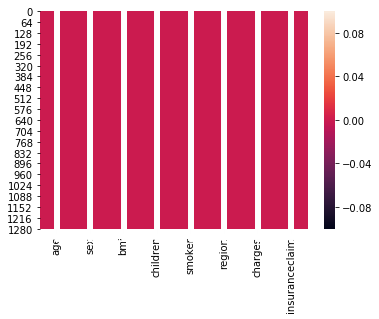

In [5]:
sns.heatmap(data.isnull(), annot=True)
plt.show()

In [6]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

So Check and there are no null values in our dataset.

## Lets check value counts of our output varibale 

In [7]:
data['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [8]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


## Lets Check the correlation

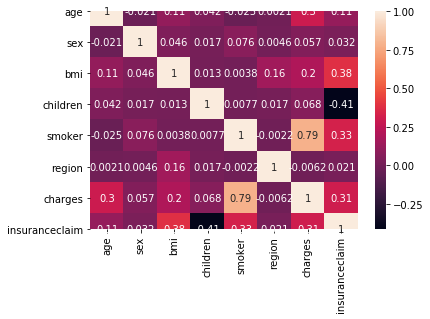

In [9]:
sns.heatmap(data.corr(),annot=True)

In [10]:
print(data.skew())
print("Number of feature having skewness more than 0.55:",len(data.skew().loc[data.skew()>0.55]))

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64
Number of feature having skewness more than 0.55: 3


In [11]:
for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index]=np.cbrt(data[index])
    if data.skew().loc[index]<-0.5:
        data.x[index]=np.cbrt(data[index])

In [12]:
print(data.skew())
print("Number of feature having skewness more than 0.55:",len(data.skew().loc[data.skew()>0.55]))

age               0.055673
sex              -0.020951
bmi               0.284047
children         -0.097116
smoker            1.464766
region           -0.038101
charges           0.515183
insuranceclaim   -0.346254
dtype: float64
Number of feature having skewness more than 0.55: 1


## Lets do Exploratary Data Analysis

In [13]:
x=data.iloc[:,:-1]

In [14]:
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.00000,1.0,3,25.654666
1,18,1,33.770,1.00000,0.0,2,11.994331
2,28,1,33.000,1.44225,0.0,2,16.447599
3,33,1,22.705,0.00000,0.0,1,28.013799
4,32,1,28.880,0.00000,0.0,1,15.695891


In [15]:
y=data['insuranceclaim']

In [16]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

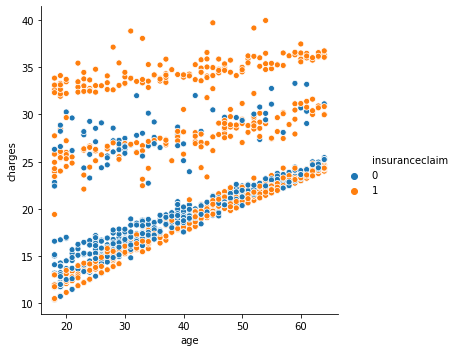

In [17]:
sns.relplot(x='age',y='charges',hue='insuranceclaim',data=data)

From the above Graph we can see that there are maximum number of claims opted when charges are high

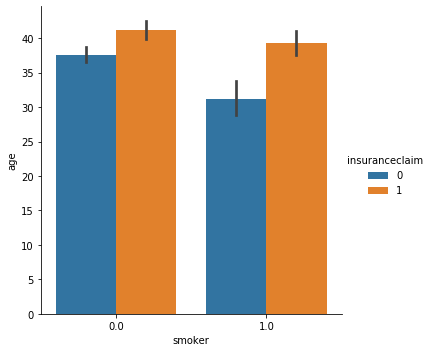

In [18]:
sns.catplot(x='smoker',y='age',hue='insuranceclaim',data=data,kind='bar')

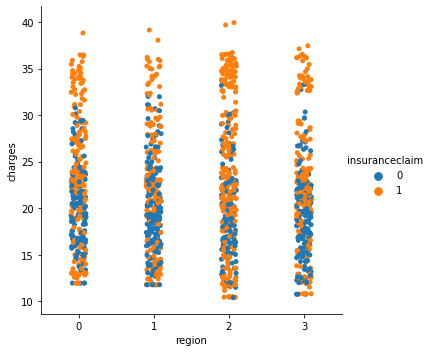

In [19]:
sns.catplot(x='region',y='charges',hue='insuranceclaim',data=data)

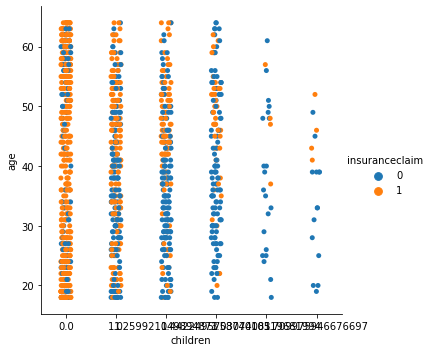

In [20]:
sns.catplot(x='children',y='age',hue='insuranceclaim',data=data)

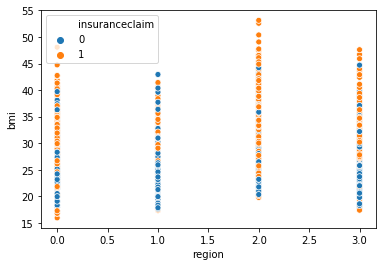

In [21]:
sns.scatterplot(x='region',y='bmi',hue='insuranceclaim',data=data)

F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


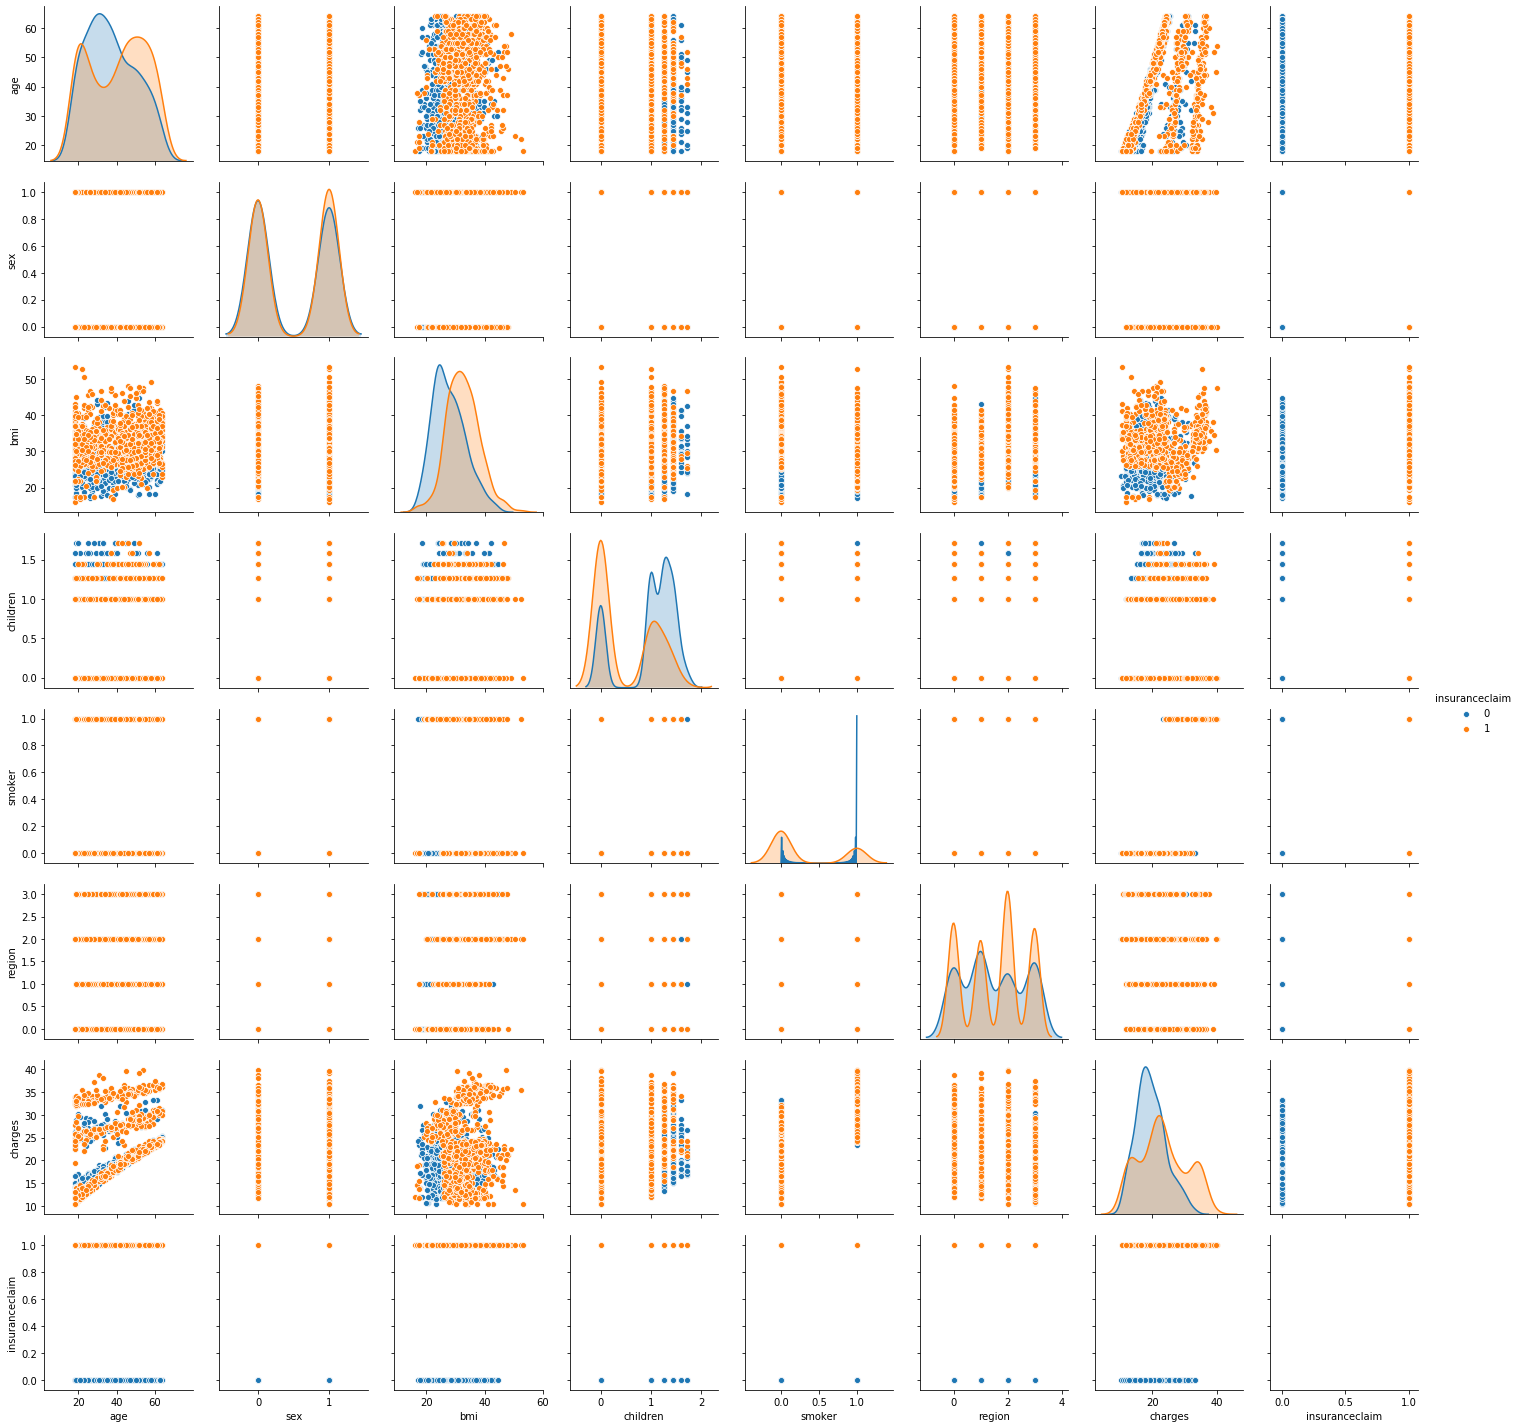

In [22]:
sns.pairplot(data,hue='insuranceclaim')

## Lets scale the input data 

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=97,stratify=y)

In [25]:
x_train.shape,x_test.shape

((1070, 7), (268, 7))

In [26]:
y_train.shape,y_test.shape

((1070,), (268,))

# Implementing all ML Algorithms to find the best model

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [28]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=56)
GBC=GradientBoostingClassifier(random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [29]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.8917910447761194


F1_Score: 0.9061488673139159


Precision_Score: 0.9210526315789473


Cross_Val_Score =  0.8639949791560161


roc_auc_score =  0.8918058185574109


classification_report
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.92      0.89      0.91       157

    accuracy                           0.89       268
   macro avg       0.89      0.89      0.89       268
weighted avg       0.89      0.89      0.89       268



[[ 99  12]
 [ 17 140]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_functio

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=56)


Accuracy_score =  0.8731343283582089


F1_Score: 0.8930817610062894


Precision_Score: 0.8819875776397516


Cross_Val_Score =  0.8596058969978845


roc_auc_score =  0.8666437137774717


classification_report
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       111
           1       0.88      0.90      0.89       157

    accuracy                           0.87       268
   macro avg       0.87      0.87      0.87       268
weighted avg       0.87      0.87      0.87       268



[[ 92  19]
 [ 15 142]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





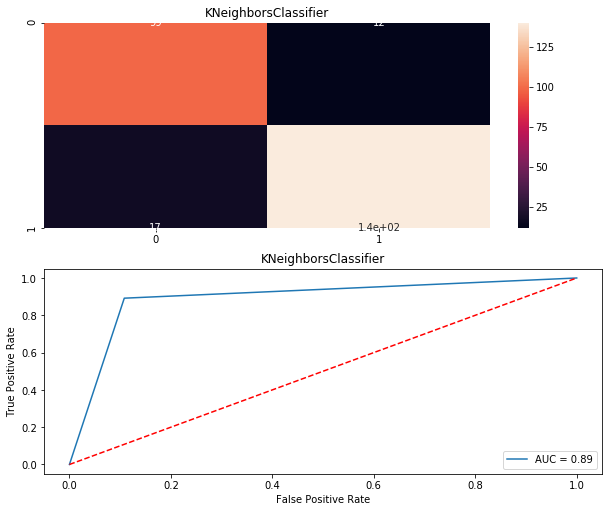

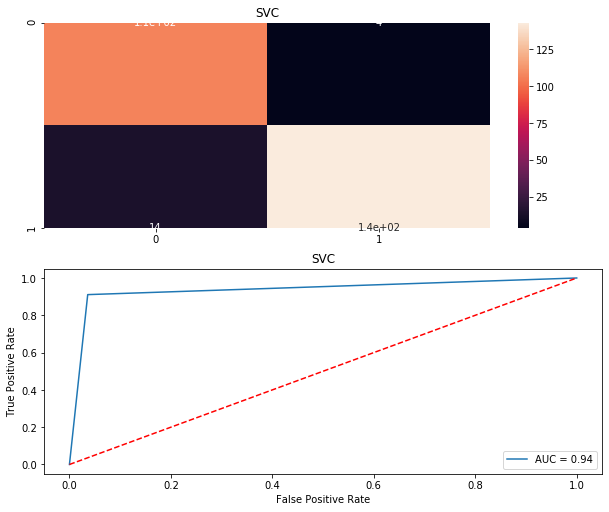

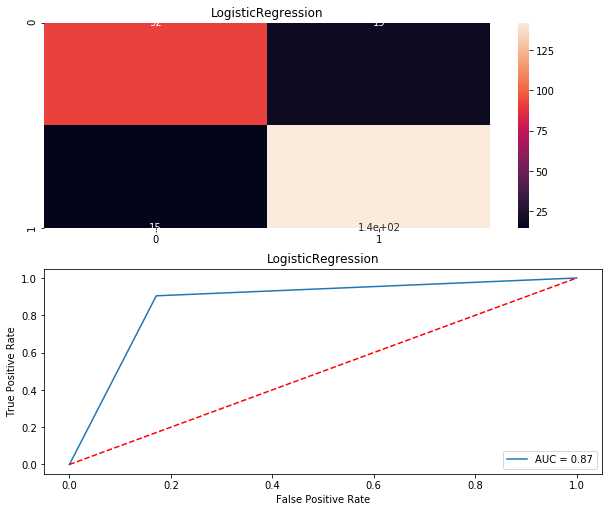

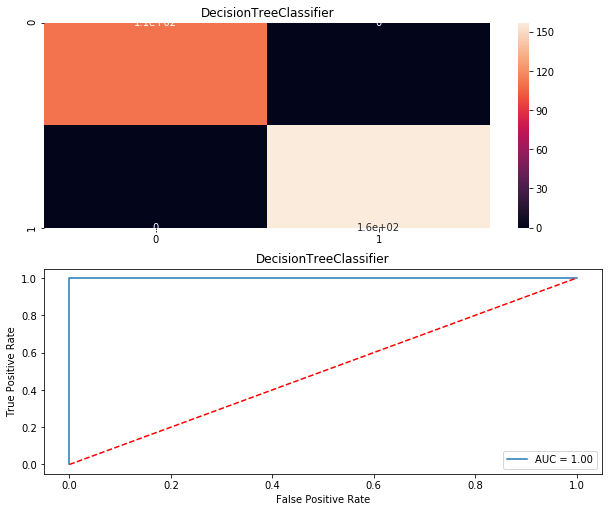

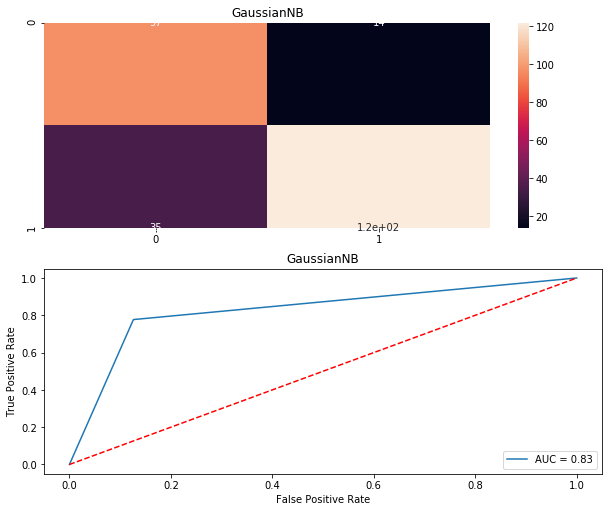

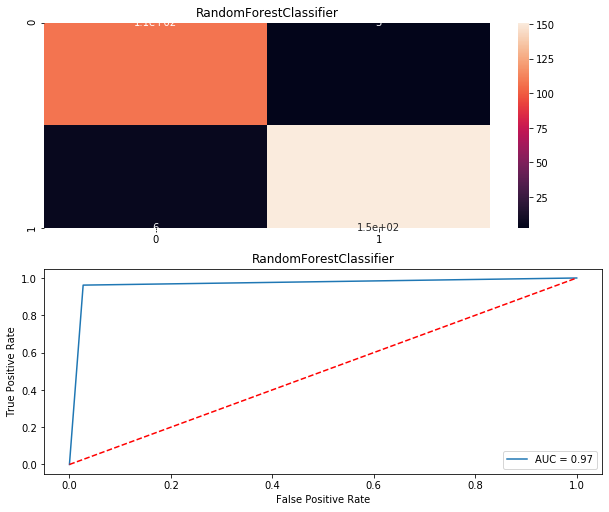

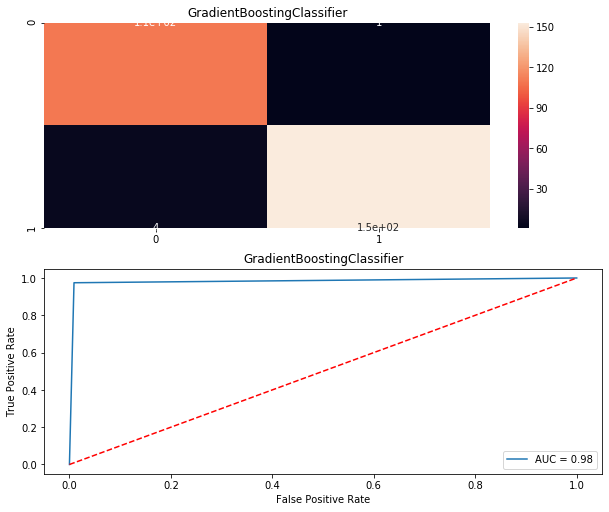

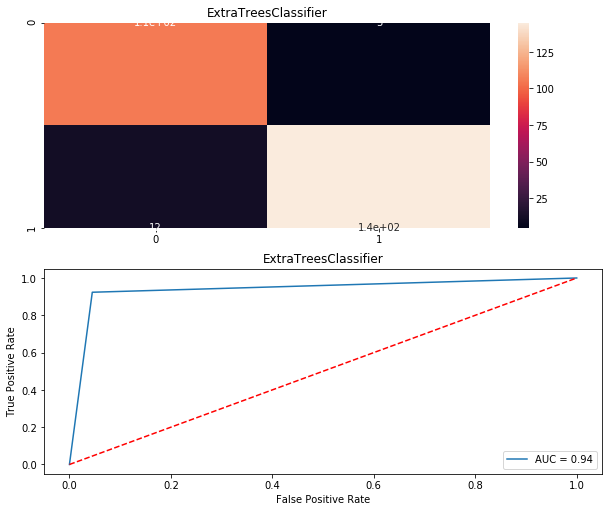

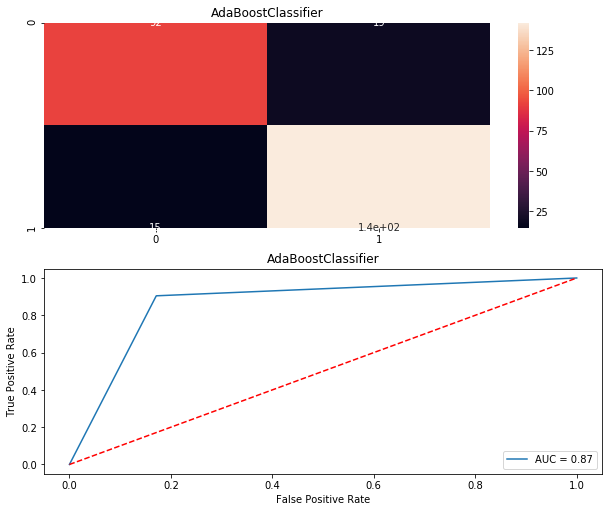

In [30]:
f1score =[]
Precisionscore = []
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    f1sco=f1_score(y_test,pre)
    print('F1_Score:',f1sco)
    f1score.append(f1sco)
    print('\n')
    pscore=precision_score(y_test,pre)
    print('Precision_Score:',pscore)
    Precisionscore.append(precision_score(y_test,pre))
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')     

In [31]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'F1_score': f1score,'Precision_score': Precisionscore,'Cross_val_score':cvs,'Roc_auc_score':rocscore})
result 

,Model,Accuracy_score,F1_score,Precision_score,Cross_val_score,Roc_auc_score
0,KNeighborsClassifier,0.891791,0.906149,0.921053,0.863995,89.180582
1,SVC,0.932836,0.940789,0.972789,0.900619,93.739599
2,LogisticRegression,0.873134,0.893082,0.881988,0.846830,86.664371
3,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.980563,100.000000
4,GaussianNB,0.817164,0.832765,0.897059,0.776599,82.547197
5,RandomForestClassifier,0.966418,0.971061,0.980519,0.940992,96.737821
6,GradientBoostingClassifier,0.981343,0.983923,0.993506,0.984294,98.275664
7,ExtraTreesClassifier,0.936567,0.944625,0.966667,0.891720,93.926092
8,AdaBoostClassifier,0.873134,0.893082,0.881988,0.859606,86.664371


Among all the above alorithms we can see that DecisionTreeClassifier and GradientBoostingClassifier is performing well, but i choose DecisionTreeClassifier as it gave highest accuracy and precision score.

For this project i hypertunned the parameter manually to get the accurate score. 

## Lets Visualize our decisiontree

In [32]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
col = list(data.columns[:-1])
col

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [33]:
dot_data = StringIO()
export_graphviz(DT,out_file=dot_data,feature_names=col,max_depth=4,filled=True)

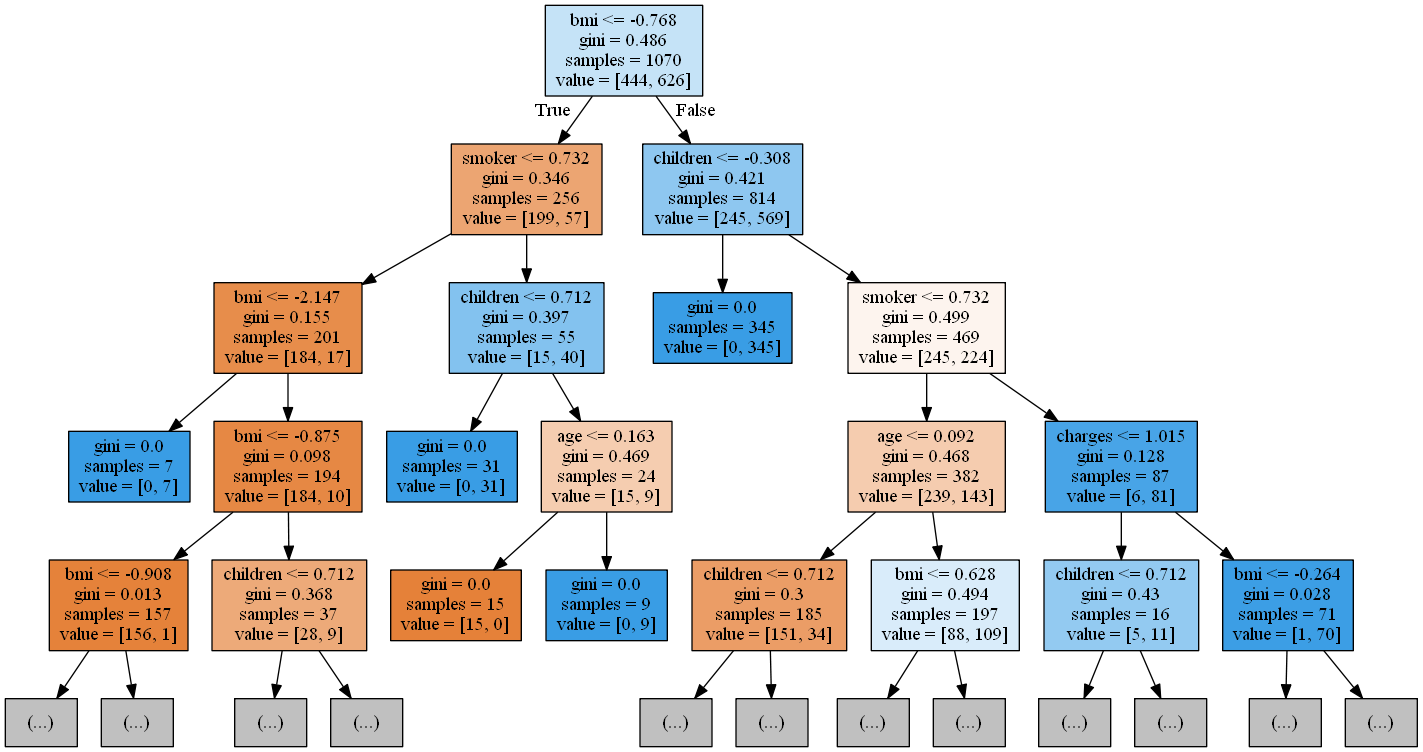

In [34]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [35]:
from sklearn.externals import joblib
joblib.dump(DT,"Model_SBI_LifeInsurance.csv")

['Model_SBI_LifeInsurance.csv']

In [36]:
model=joblib.load("Model_SBI_LifeInsurance.csv")

In [37]:
model.predict(x_test)

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)